# A country's GDP does not always predict its life expectancy

Based on the data that on GDP and life expectancy from the World Health Organization and the World Bank, provided by Code Cademy. I came to the conclusion that:\
__"A country's GDP does not always predict its life expectancy"__\
The rest of this blog will detail how I analyzed and looked for any relationship that might exist between GDP and life expectancy for 6 countries and came to my previously stated conclusion.

__Gross Domestic Product__ $(GDP)$ is the total monetary value of all final goods and services produced within a country’s borders in a specific period (a year for this dataset). It measures the size and health of an economy by capturing how much is being produced and sold.

__Life Expectancy__ of a country is the average number of years a newborn is expected to live if mortality rates at their time of birth for each age remain constant throughout their lifetime.

By studying the relationship between GDP and life expectancy, we can learn how the wealth of a country affects its population's health.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # optional

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import statsmodels.api as sm

import matplotlib.ticker as mticker

Import the data into a pandas dataframe called *'all_data'*.\
Study the columns.

In [2]:
all_data = pd.read_csv('all_data.csv')

In [3]:
print(all_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [4]:
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## First look at the data

With 96 entries, this isn't a large data set.\
Only 4 columns to work with, 3 being numeric with 1 categorical.\
But as we can see from the values, GDP seems to be in raw usd, let's convert that into trillions and add it to a new column called 'GDP_trillions'.

In [5]:
all_data['GDP_trillions'] = all_data['GDP'] / 1e12
print(all_data.head())

  Country  Year  Life expectancy at birth (years)           GDP  GDP_trillions
0   Chile  2000                              77.3  7.786093e+10       0.077861
1   Chile  2001                              77.3  7.097992e+10       0.070980
2   Chile  2002                              77.8  6.973681e+10       0.069737
3   Chile  2003                              77.9  7.564346e+10       0.075643
4   Chile  2004                              78.0  9.921039e+10       0.099210


## Scope

The main purpose of this blog to understand the relationship between the life expectancy and GDP so I visualize the graph comparing them directly.\
As there are also information about the countries and the years so I chose to study how GDP and life expectancy changes over the years as well for each country.\
The graphs I will be plotting and analyzing are:
1. Scatterplot between Life Expectancy and GDP
2. Scatterplot between Life Expectancy and Year
3. Scatterplot between GDP and Year
    * For graphs 1 to 3 I will be plotting:
        * Combined data of all 6 countries; and
        * Scatter plot for each individual country.
4. Line plot of average GDP for each country.
5. Violin plot of life expectancy for each country.

### Countries and years
Let's study the data and list out unique values for the country and year columns.

In [6]:
countries = all_data['Country'].unique().tolist()
years = all_data['Year'].unique().tolist()
print(f"This dataset contains {len(countries)} countries:\n{countries}")
print(f"This dataset spans {len(years)} years from {years[0]} till {years[-1]}.")

This dataset contains 6 countries:
['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']
This dataset spans 16 years from 2000 till 2015.


### GDP
I calculated some of the exploratory data analysis for GDP to be used later.

In [14]:
country_order = ['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
country_GDP_mean = []
country_GDP_min = []
country_GDP_max = []

for x in country_order:
    mean_gdp = np.mean(all_data[all_data.Country == x].GDP_trillions)
    country_GDP_mean.append(mean_gdp)
    min_gdp = np.min(all_data[all_data.Country == x].GDP_trillions)
    country_GDP_min.append(min_gdp)
    max_gdp = np.max(all_data[all_data.Country == x].GDP_trillions)
    country_GDP_max.append(max_gdp)  

### 1. Life Expectancy versus GDP

The main comparison here that we want to analyze is the relationship between Life expectancy at birth versus GDP.\
The first study should be to see the scatter graph between these two variables with GDP being the x-axis.

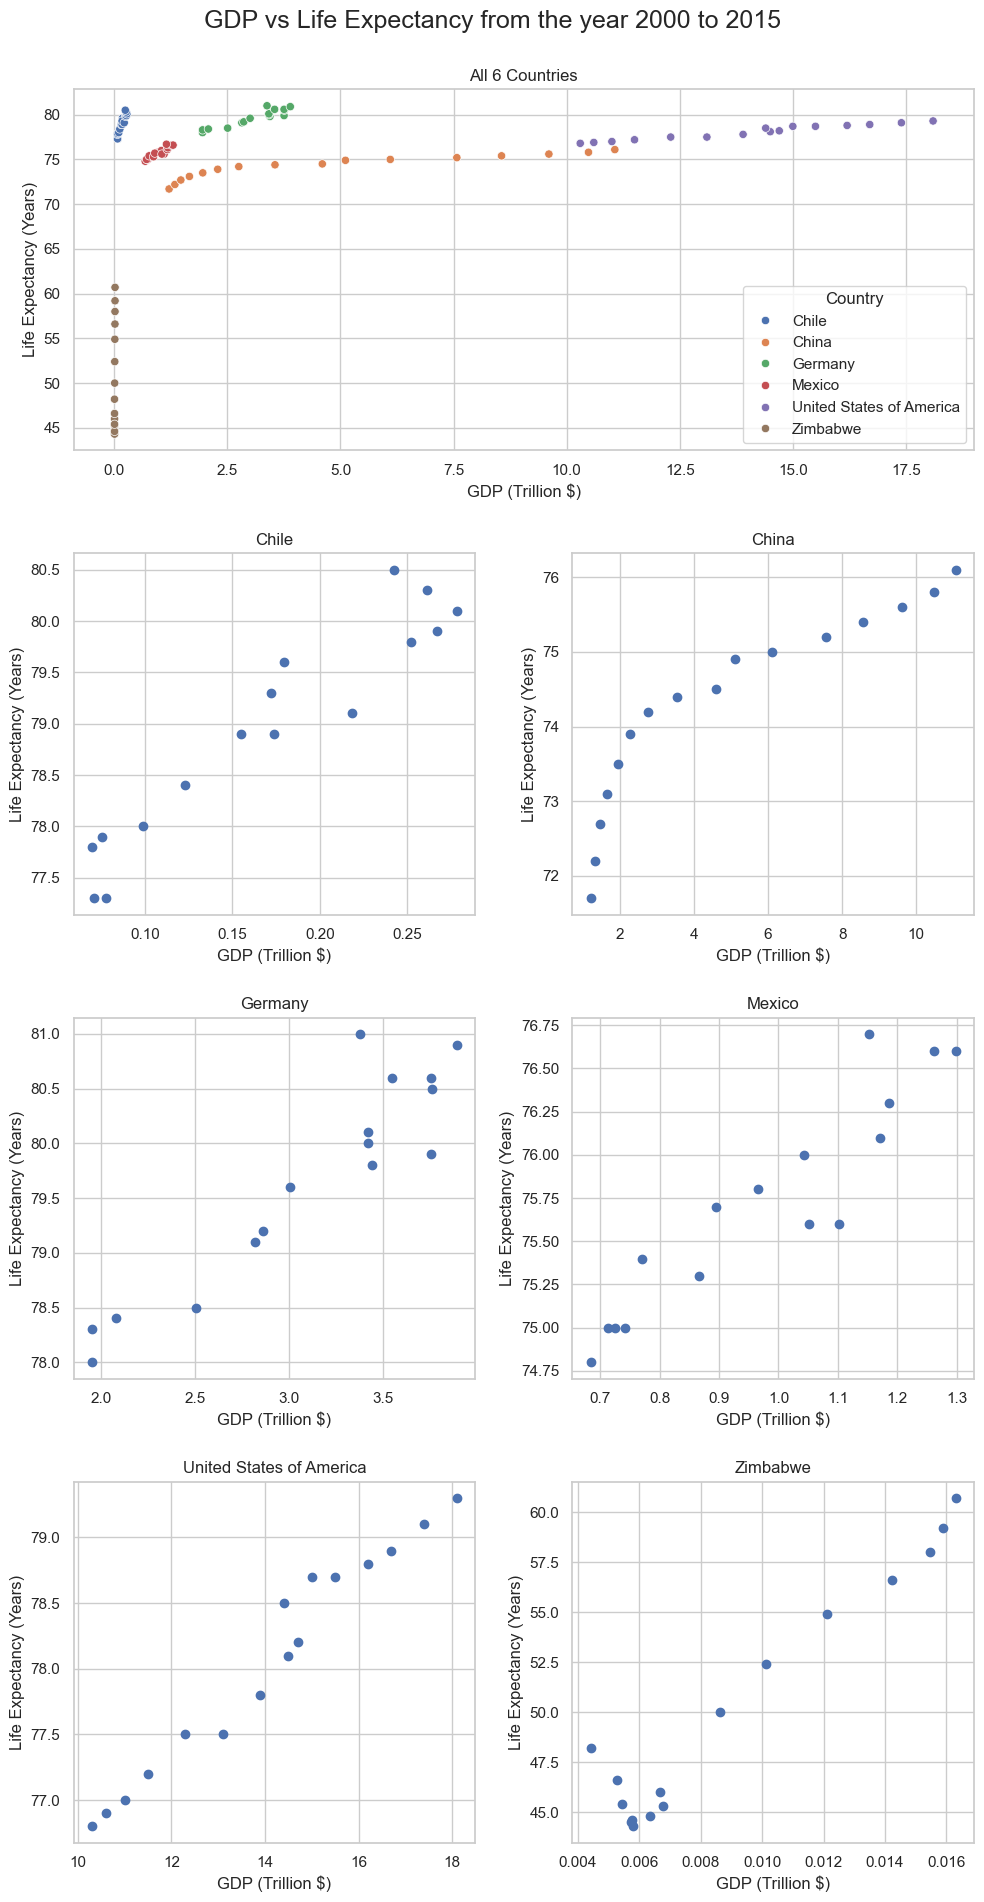

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(10, 20))
plt.suptitle("GDP vs Life Expectancy from the year 2000 to 2015", fontsize=18, y=0.95)

# Main plot centered
plt.subplot(4, 2, (1, 2))
sns.scatterplot(
    data=all_data,
    x='GDP_trillions',
    y='Life expectancy at birth (years)',
    hue='Country'
)
plt.title("All 6 Countries")
plt.xlabel("GDP (Trillion $)")
plt.ylabel("Life Expectancy (Years)")

# Subplots for each country (start from subplot #3)
for n in range(len(countries)):
    plt.subplot(4,2,n+3)
    plt.scatter(all_data[all_data.Country == countries[n]].GDP_trillions, all_data[all_data.Country == countries[n]]['Life expectancy at birth (years)'])
    plt.title(countries[n])
    plt.xlabel("GDP (Trillion $)")
    plt.ylabel("Life Expectancy (Years)")
    
plt.tight_layout(h_pad=2.0, w_pad=1.5, rect=[0, 0, 1, 0.95])
plt.savefig("gdp_life_expectancy_scatter.png", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

#### Observation 1
From the scatterplot, we can see that Zimbabwe, Chile, and Mexico have a much lower GDP than the other countries making it very difficult to compare on the combined graph.\
But we can still notice that the life expectancy for all 5 countries except Zimbabwe range between 70 to 85 years, while Zimbabwe ranges between 44 to 61 years.\
The individual graphs for each country shows a much clearer image of the relationship, and they all suggest that life expectancy has a positive correlation with GDP.\
The preliminary take away is that the life expectancy is expected to increase with the GDP of the country, but we can't make this conclusion yet.

## Life Expectancy and GDP versus Year
Even though GDP and Life Expectancy seem to be positively correlated, we cannot assume causation.\
It would be prudent to study each variable's change with time.

### 2. Life Expectancy Versus Year

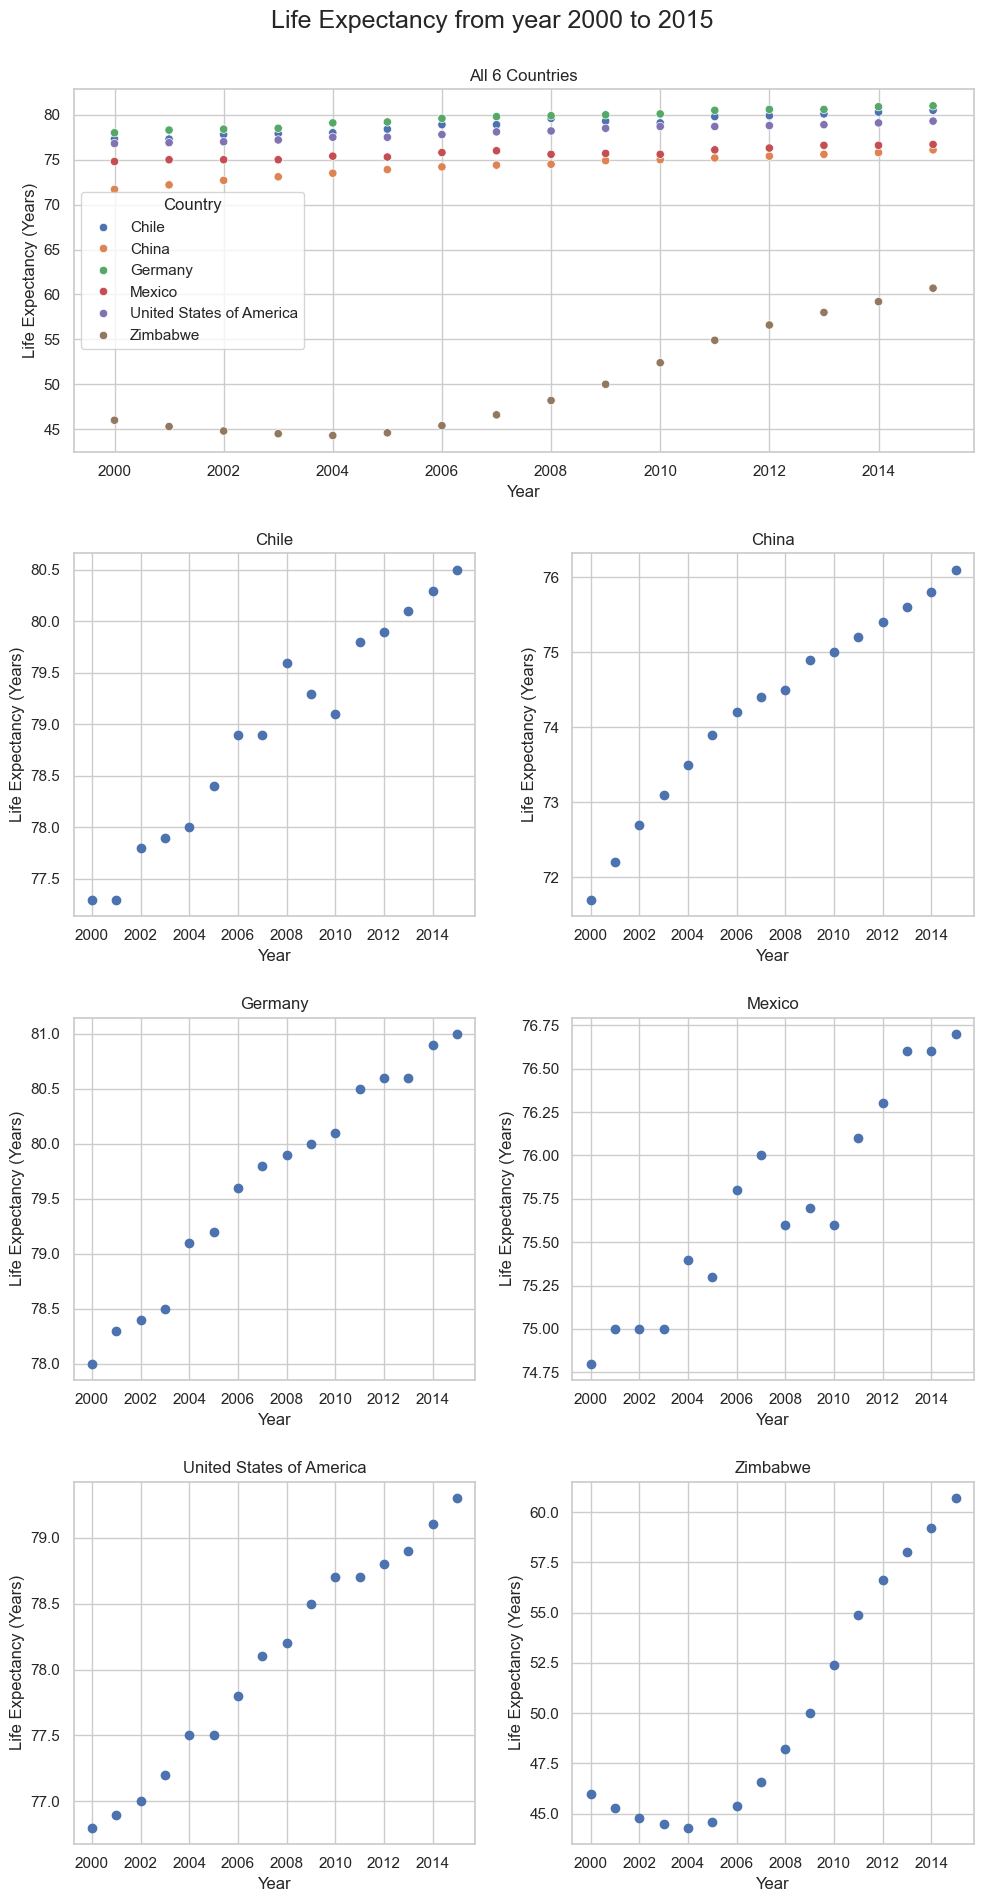

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(10, 20))
plt.suptitle("Life Expectancy from year 2000 to 2015", fontsize=18, y=0.95)

# Main plot centered
plt.subplot(4, 2, (1, 2))
sns.scatterplot(
    data=all_data,
    x='Year',
    y='Life expectancy at birth (years)',
    hue='Country'
)
plt.title("All 6 Countries")
plt.xlabel("Year")
plt.ylabel("Life Expectancy (Years)")

plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Subplots for each country (start from subplot #3)
for n in range(len(countries)):
    plt.subplot(4,2,n+3)
    plt.scatter(all_data[all_data.Country == countries[n]].Year, all_data[all_data.Country == countries[n]]['Life expectancy at birth (years)'])
    plt.title(countries[n])
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy (Years)")
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    
plt.tight_layout(h_pad=2.0, w_pad=1.5, rect=[0, 0, 1, 0.95])
plt.savefig("year_life_expectancy_scatter.png", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

### Observation 2
Now we notice that Zimbabwe has a much lower life expectancy than the other countries.\
While the other 5 countries seem to have the life expectancy between the range of 70 to 85 years, Zimbabwe's range is only between 44 to 61 years, and average between 20 to 30 years less than other countries.\
From my research, between 1999 and 2005, life expectancy in Zimbabwe collapsed as health services broke down, HIV/AIDS spread unchecked, and chronic food shortages took hold. By the mid-2000s, average lifespans had fallen below 40 years, among the lowest in the world (Human Rights Watch, 2005; BBC News, 2005).\
The information from my research does not quite match the data as the graph does not fall below 44, but the counclusion remains the same. Zimbabwe faced a crisis that resulted in a much lower life expectancy during those years as compared to the other five countries.\
Putting this information aside, the life expectancy for Zimbabwe started growing after 2005 until our data ends at 2015. This is similar to the growth trend we see of other contries from 2000 to 2015 as well.\
The conclusion we may draw is that; barring any social or environmental crises; life expectancy for each country seems to grow with time.

### 3. GDP Versus Year

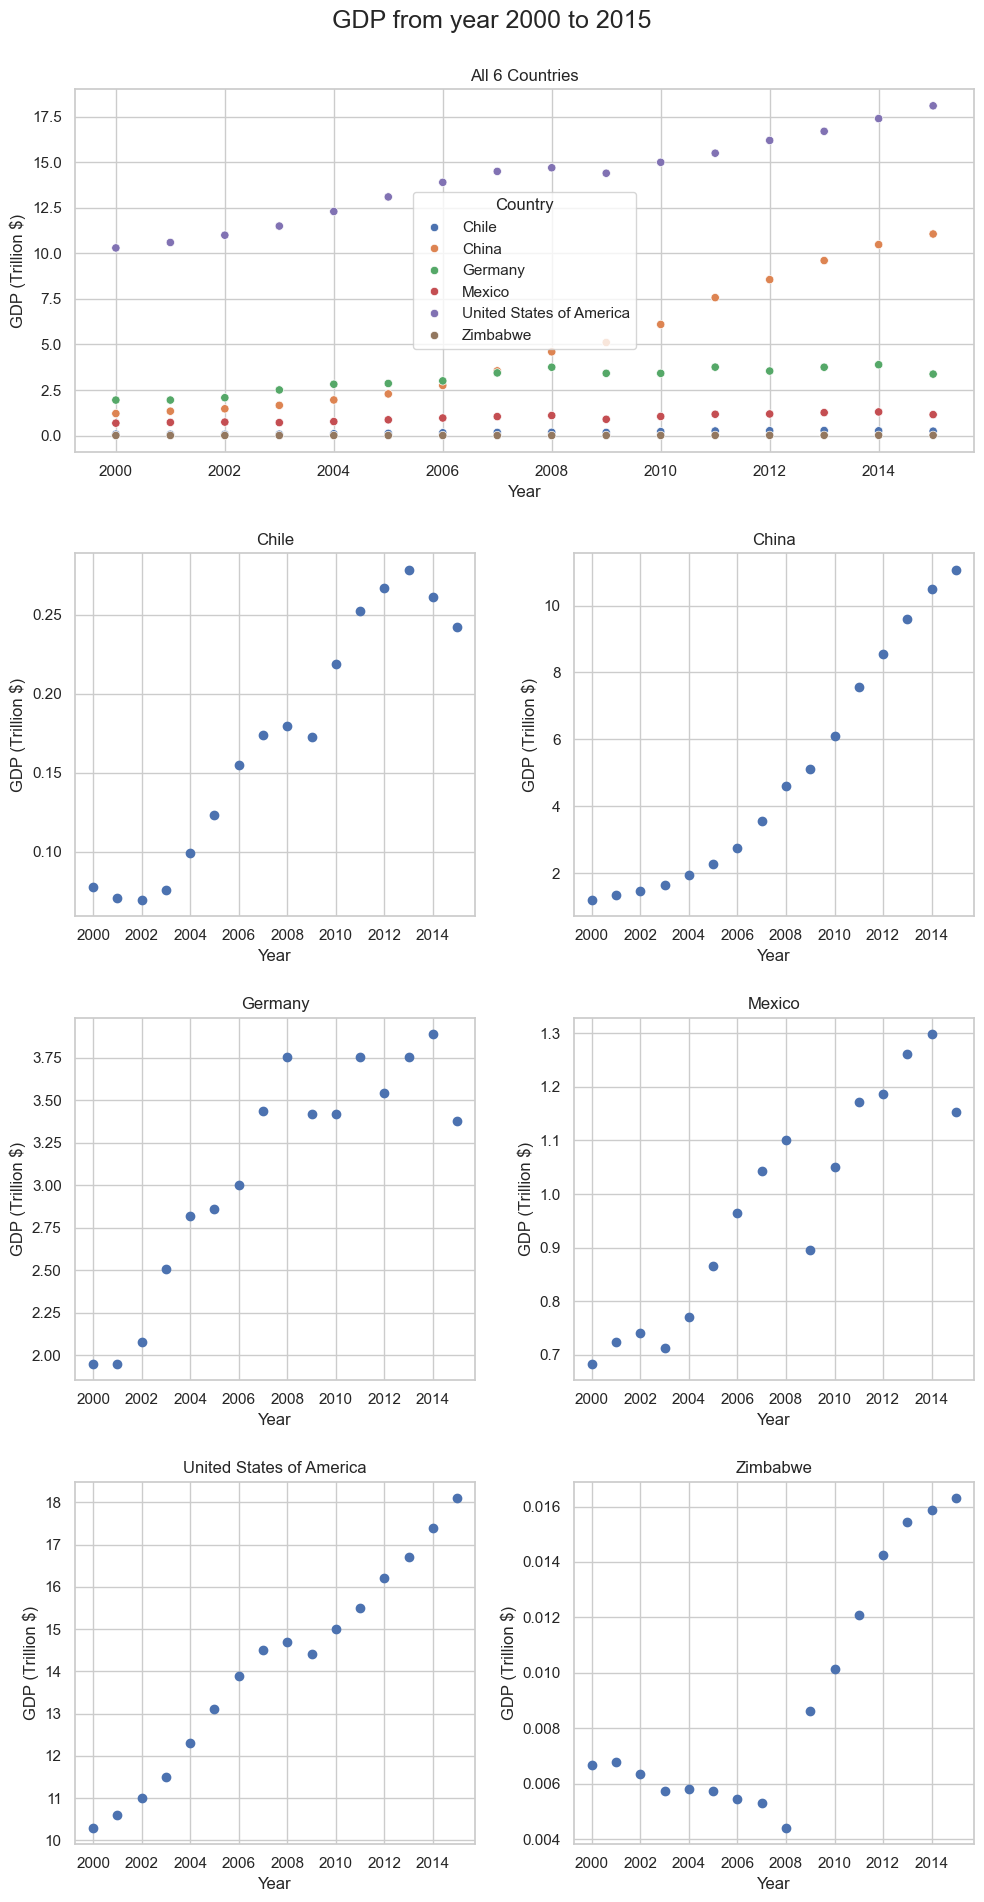

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(10, 20))
plt.suptitle("GDP from year 2000 to 2015", fontsize=18, y=0.95)

# Main plot centered
plt.subplot(4, 2, (1, 2))
sns.scatterplot(
    data=all_data,
    x='Year',
    y='GDP_trillions',
    hue='Country'
)
plt.title("All 6 Countries")
plt.xlabel("Year")
plt.ylabel("GDP (Trillion $)")
plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

# Subplots for each country (start from subplot #3)
for n in range(len(countries)):
    plt.subplot(4,2,n+3)
    plt.scatter(all_data[all_data.Country == countries[n]].Year, all_data[all_data.Country == countries[n]]['GDP_trillions'])
    plt.title(countries[n])
    plt.xlabel("Year")
    plt.ylabel("GDP (Trillion $)")
    plt.gca().xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    
plt.tight_layout(h_pad=2.0, w_pad=1.5, rect=[0, 0, 1, 0.95])
plt.savefig("year_gdp_scatter.png", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

### Observation 3

Again we see that, with the exception of Zimbabwe, all countries show a clear positive relationship between GDP and Year.\
From my research, after 1999, Zimbabwe’s GDP began a steep decline as land seizures dismantled commercial farming. The economy contracted almost every year, with hyperinflation accelerating the collapse. By 2008, annual inflation reached an astronomical 79.6 billion percent, and GDP had shrunk by more than 40% compared to 2000 levels. Industry, services, and agriculture all nearly ground to a halt, leaving much of the population reliant on food aid and informal trade (IMF, 2009; BBC News, 2009).\
This explains the steep decline in Zimbabwe's GDP from 2000 to 2008 while all other countries' GDP grew. After 2008 Zimbabwe's GDP also started recovering and growing with time.\
This means that both GDP and Life Expectancy; barring any major mishap; is observed to grow over time, hence that is why they also have a positive relationship between each other.

### 4. GDP by Country

We now see that we can't assume a clear causational relationship between life expectancy and gdp, so let's compare their average values across the countries, starting with gdp.

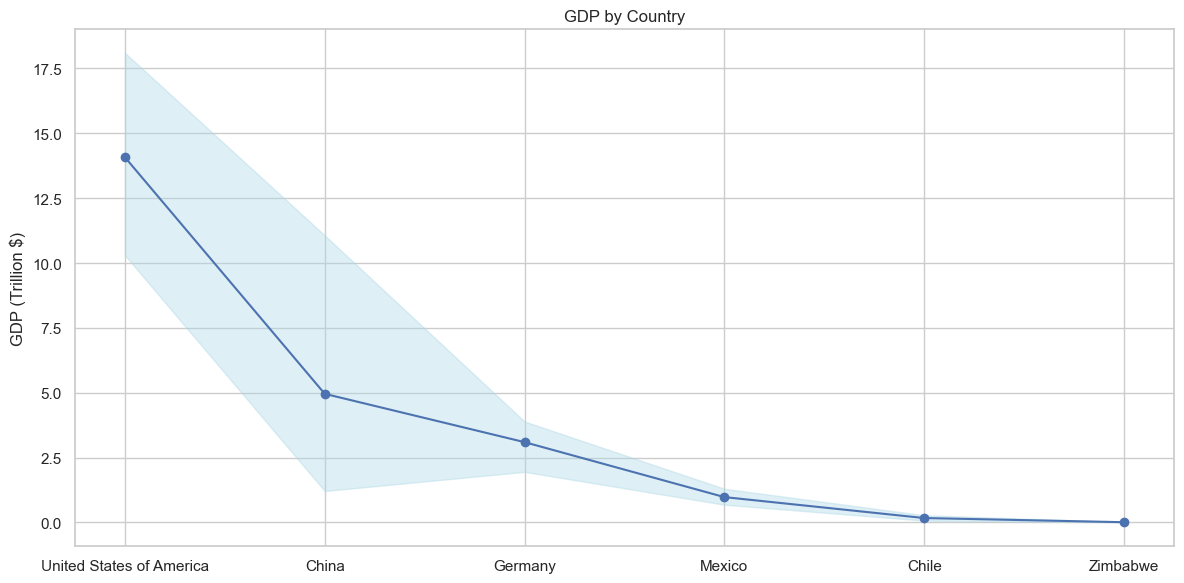

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(12, 6))

x_numeric = list(range(len(country_order)))

plt.plot(x_numeric, country_GDP_mean, marker='o')
plt.fill_between(
    x_numeric,
    country_GDP_min,
    country_GDP_max,
    color='lightblue',
    alpha=0.4,
)
plt.xticks(ticks=x_numeric, labels=country_order)
plt.title("GDP by Country")
plt.ylabel("GDP (Trillion $)")
plt.tight_layout()
plt.savefig("gdp_line.png", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

### Observation 4
Putting aside Zimbabwe from my analysis due to the crisis it was facing as explained earlier, we can see that the country with the second lowest GDP is Chile and the value seems to grow almost linearly between Mexico, Germany, and China, while USA's GDP is much higher than the rest.\
If we were to assume a true positive causational relationship gdp and life expectancy, we would also expect Chile to have to second lowest average life expectancy with Mexico being next in line, followed by Germany, then China, than finally USA with the largest life expectancy.

### 5. Life Expectancy by Country

Now for average life expectancy between each country.

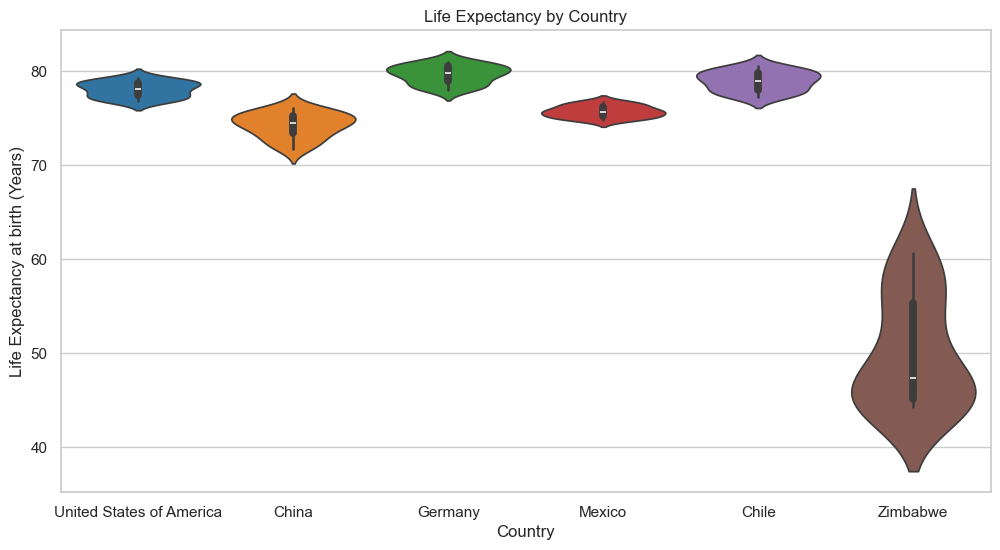

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(12, 6))

sns.violinplot(
    data=all_data,
    x='Country',
    y='Life expectancy at birth (years)',
    palette='tab10',
    order=['United States of America', 'China', 'Germany', 'Mexico', 'Chile', 'Zimbabwe']
)
plt.title("Life Expectancy by Country")
plt.ylabel("Life Expectancy at birth (Years)")

plt.savefig("life_exp_violin.png", dpi=300, bbox_inches='tight')
plt.show()
plt.clf()

### Observation 5
Not surprising that Zimbabwe has the lowest average life expectancy, yet when looking at the other 5 countries, we fail to the see the same relationship we saw earlier with the GDP.\
In fact our graphs shows that Chile, Germany, and USA have almost the same average life expectancy at about 80 years, while China and Mexico have similar values of about 75 years.

# Conclusion

Although inital study shows that Life Expectancy and GDP does have an overall positive correlation. We can see that it is due both Life Expectancy and GDP increasing with time. Whereas from the graph by country we can see that there is no clear trend between Life Expectancy and GDP as the trend for GDP with each country is not reflected in the trend for Life Expectancy.\
The only country that shows somewhat of a clearer relationship is Zimbabwe, which has both GDP and life expectancy much lower than the other countries.\
We can conclude that as long as a country has its annual GDP at least equal to Chile; and is not facing any political, economical, and healthcare crisis; then it is likely that its life expectancy would be between 70 to 80 years.\
If a country is going through a crisis like Zimbabwe then it would impact both its GDP and life expectancy resulting in the outcome we observed.\
In all cases life expectancy is expected to grow every year along with GDP.\
Hence my conclusion is that GDP and life expectancy does not have a clear relationship where one can act as a predictor for another.

# Afterwords

Although I stand by my conclusion that a country's total GDP does not have a clear relationship with its life expectancy, this data only covers 6 countries; hence with more data a different pattern might emerge suggesting a different possible conclusion.\
Another metric that might also help us understand this relationship is to know the population sizes of each country in the given timeline in order to study its GDP Per Capita which should serve as a better comparison point when trying to understand life expectancy.\
Other metrics might also be useful to study such as:
* Annual Healthcare Budget
* Obesity Rates
* Crime Rates

And various other statistics that might affect a person's livelihood and cause of death.

### References
* BBC News. (2005). Article, http://news.bbc.co.uk/2/hi/africa/1063785.stm
* Human Rights Watch. (2005). Report, https://www.hrw.org/report/2005/09/11/clear-filth/mass-evictions-and-demolitions-zimbabwe
* IMF. (2009). *Zimbabwe: 2009 Article IV Consultation*.
* BBC News. (2009). Zimbabwe in Crisis, http://news.bbc.co.uk/2/hi/africa/7847153.stm